In [1]:
import numpy as np
import joblib
import os

from sklearn.model_selection import train_test_split

import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Loading saved models

X = joblib.load('/home/systemcommand/bangkit/enkrateia/app/emotion/joblib/X.joblib')
y = joblib.load('/home/systemcommand/bangkit/enkrateia/app/emotion/joblib/y.joblib')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=32)

In [4]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [5]:
x_traincnn.shape, x_testcnn.shape

((3518, 40, 1), (1734, 40, 1))

In [6]:
model = Sequential()
model.add(Conv1D(64, 5, padding='same',
                 input_shape=(40, 1)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 64)            384       
_________________________________________________________________
activation (Activation)      (None, 40, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 20488     
_________________________________________________________________
activation_1 (Activation)    (None, 8)                 0         
Total params: 20,872
Trainable params: 20,872
Non-trainable params: 0
____________________________________________________

In [8]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [9]:
cnn_history = model.fit(x_traincnn, y_train,
                        batch_size=16, epochs=100,
                        validation_data=(x_testcnn, y_test))

Epoch 1/100
220/220 [==============================] - 29s 8ms/step - loss: 7.2413 - accuracy: 0.3266 - val_loss: 2.0013 - val_accuracy: 0.5617
Epoch 2/100
220/220 [==============================] - 1s 4ms/step - loss: 2.1175 - accuracy: 0.5876 - val_loss: 0.8998 - val_accuracy: 0.7024
Epoch 3/100
220/220 [==============================] - 1s 4ms/step - loss: 1.1639 - accuracy: 0.6577 - val_loss: 0.7859 - val_accuracy: 0.7336
Epoch 4/100
220/220 [==============================] - 1s 4ms/step - loss: 0.8387 - accuracy: 0.7104 - val_loss: 0.6656 - val_accuracy: 0.7780
Epoch 5/100
220/220 [==============================] - 1s 4ms/step - loss: 0.7900 - accuracy: 0.7234 - val_loss: 0.7481 - val_accuracy: 0.7428
Epoch 6/100
220/220 [==============================] - 1s 4ms/step - loss: 0.7011 - accuracy: 0.7473 - val_loss: 0.6504 - val_accuracy: 0.7849
Epoch 7/100
220/220 [==============================] - 1s 4ms/step - loss: 0.6541 - accuracy: 0.7667 - val_loss: 0.7971 - val_accuracy: 0.746

Epoch 58/100
220/220 [==============================] - 1s 4ms/step - loss: 0.3895 - accuracy: 0.8589 - val_loss: 0.6523 - val_accuracy: 0.8253
Epoch 59/100
220/220 [==============================] - 1s 4ms/step - loss: 0.4159 - accuracy: 0.8574 - val_loss: 0.7037 - val_accuracy: 0.7958
Epoch 60/100
220/220 [==============================] - 1s 4ms/step - loss: 0.3952 - accuracy: 0.8656 - val_loss: 0.6150 - val_accuracy: 0.8235
Epoch 61/100
220/220 [==============================] - 1s 4ms/step - loss: 0.3798 - accuracy: 0.8696 - val_loss: 0.6316 - val_accuracy: 0.8235
Epoch 62/100
220/220 [==============================] - 1s 4ms/step - loss: 0.3866 - accuracy: 0.8747 - val_loss: 0.6678 - val_accuracy: 0.8172
Epoch 63/100
220/220 [==============================] - 1s 4ms/step - loss: 0.3955 - accuracy: 0.8629 - val_loss: 0.6248 - val_accuracy: 0.8230
Epoch 64/100
220/220 [==============================] - 1s 4ms/step - loss: 0.3948 - accuracy: 0.8672 - val_loss: 0.6133 - val_accuracy:

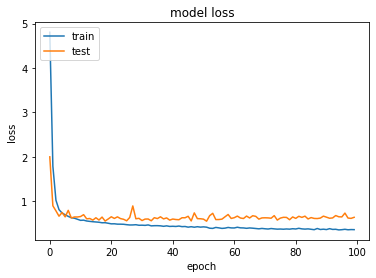

In [10]:
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

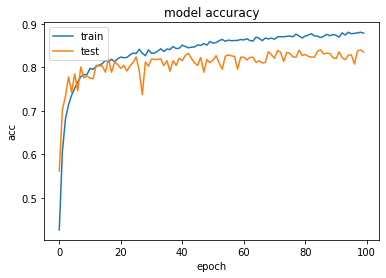

In [11]:
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
predictions = model.predict_classes(x_testcnn)
new_y_test = y_test.astype(int)
print(classification_report(new_y_test, predictions))

/home/systemcommand/bangkit/enkrateia/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.88      0.88      0.88       194
           1       0.76      0.78      0.77       131
           2       0.75      0.88      0.81       257
           3       0.87      0.78      0.82       248
           4       0.93      0.86      0.89       261
           5       0.83      0.82      0.83       247
           6       0.77      0.87      0.81       188
           7       0.91      0.80      0.85       208

    accuracy                           0.84      1734
   macro avg       0.84      0.83      0.83      1734
weighted avg       0.84      0.84      0.84      1734



In [13]:
matrix = confusion_matrix(new_y_test, predictions)
print(matrix)

[[171   8   5   1   0   2   6   1]
 [  4 102  13   3   0   1   8   0]
 [  3   3 225   3   6  14   1   2]
 [  3  11  12 194   0  10  14   4]
 [  2   2  13   3 225   8   6   2]
 [  4   4  13  15   2 202   3   4]
 [  4   3   5   2   8   0 163   3]
 [  4   1  16   2   2   5  12 166]]


In [14]:
model_name = 'Emotion_Voice_Detection_Model.pbtx'
save_dir = '/home/systemcommand/bangkit/enkrateia/app/emotion/model/'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

INFO:tensorflow:Assets written to: /home/systemcommand/bangkit/enkrateia/app/emotion/model/Emotion_Voice_Detection_Model.pbtx/assets
Saved trained model at /home/systemcommand/bangkit/enkrateia/app/emotion/model/Emotion_Voice_Detection_Model.pbtx 


In [15]:
loaded_model = keras.models.load_model('/home/systemcommand/bangkit/enkrateia/app/emotion/model/Emotion_Voice_Detection_Model.pbtx')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 64)            384       
_________________________________________________________________
activation (Activation)      (None, 40, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 20488     
_________________________________________________________________
activation_1 (Activation)    (None, 8)                 0         
Total params: 20,872
Trainable params: 20,872
Non-trainable params: 0
____________________________________________________

In [16]:
loss, acc = loaded_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

55/55 [==============================] - 1s 2ms/step - loss: 0.6404 - accuracy: 0.8351
Restored model, accuracy: 83.51%
